# The Sparks Foundation: April Batch`21

## Global Terrorism(1970-2017)
### The purpose of this dataset is to look into the data to analyse it and further learn about the Hotspot of Terror Attacks.

### Importing Required Libraries: -

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading Data/ Data Inspection

In [2]:
data = pd.read_csv(r'globalterrorismdb_0718dist.csv')
print(data.shape)
data.head(3)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


###### As we can see, this is a huge dataset consisting of huge features.
###### We might not be able to gather insights from all these features; Thus, we need to scale down the features.
###### But first let's look into the useful data.

In [3]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
print('The region of', data['region_txt'].value_counts().idxmax(),'have faced most attacks, facing a total of',
      data['region_txt'].value_counts().max())

The region of Middle East & North Africa have faced most attacks, facing a total of 50474


In [5]:
print(data['city'].value_counts().idxmax(), 'Cities were the target of these attacks most of the time, consisting of total',
      data['city'].value_counts().max(), 'attacks.')

Unknown Cities were the target of these attacks most of the time, consisting of total 9775 attacks.


In [6]:
print('The most known cities which is targeted the most is', data['city'].value_counts(dropna=True).index[1])

The most known cities which is targeted the most is Baghdad


In [7]:
print('The most used used method in terror attack was', data['weaptype1_txt'].value_counts().idxmax(), 'which was used',
      data['weaptype1_txt'].value_counts().max(), 'times.')

The most used used method in terror attack was Explosives which was used 92426 times.


In [8]:
print('Country that faced the terror attacks the most is', data['country_txt'].value_counts().idxmax(),'. It faced a total of',
      data['country_txt'].value_counts().max(), 'attacks.')

Country that faced the terror attacks the most is Iraq . It faced a total of 24636 attacks.


In [9]:
suicide = data['suicide'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
# suicide[1]
print('Out of', data['suicide'].value_counts().sum(), 'total attacks', suicide[1], 'was suicidal attacks.')

Out of 181691 total attacks 3.7% was suicidal attacks.


In [10]:
print('The most frequently used method in the attacks were', data['attacktype1_txt'].value_counts().idxmax(), '. It was used on', 
     data['attacktype1_txt'].value_counts().max(), 'occasions.')

The most frequently used method in the attacks were Bombing/Explosion . It was used on 88255 occasions.


In [11]:
terror = data['targtype1_txt'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Main target of this attack was', data['targtype1_txt'].value_counts().idxmax(), ' totalling of',
      terror[0], 'attacks. While the second most victim were none other than the',
      data['targtype1_txt'].value_counts().index[1], 'as they were attacked on',
      terror[1], 'occasions.')

Main target of this attack was Private Citizens & Property  totalling of 23.9% attacks. While the second most victim were none other than the Military as they were attacked on 15.4% occasions.


#### We have extracted the useful data from the original dataset.
### Now we will scale down the data, with the features, which can give meaning to the enitre dataset.

In [ ]:
#renaming the coulmns for ease of use
data.rename(columns=
            {'iyear':'Year','imonth':'Month','city':'City',
             'iday':'Day','country_txt':'Country','region_txt':'Region',
             'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
             'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
             'weaptype1_txt':'Weapon_type','motive':'Motive', 'success':'Success'}, inplace=True)



In [13]:
### adding a new feature
data['Casualties'] = data['Killed'] + data['Wounded']

### choosing only required features
data = data[['Year', 'Month', 'City', 'Day', 'Country', 'Region',
             'AttackType', 'Target', 'Killed', 'Wounded', 'Casualties',
             'Success', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive']]

In [14]:
data.head(3)

,Year,Month,City,Day,Country,Region,AttackType,Target,Killed,Wounded,Casualties,Success,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,Santo Domingo,2,Dominican Republic,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,1.0,1,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,Mexico city,0,Mexico,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,0.0,1,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,Unknown,0,Philippines,Southeast Asia,Assassination,Employee,1.0,0.0,1.0,1,NaN,Unknown,Journalists & Media,Unknown,NaN


In [15]:
data.isnull().sum()/data.shape[0]*100

Year            0.000000
Month           0.000000
City            0.238867
Day             0.000000
Country         0.000000
Region          0.000000
AttackType      0.000000
Target          0.350045
Killed          5.676120
Wounded         8.977330
Casualties      9.287196
Success         0.000000
Summary        36.396409
Group           0.000000
Target_type     0.000000
Weapon_type     0.000000
Motive         72.171984
dtype: float64

### Yearly Terror Attacks 

Text(0.5, 1.0, 'Terrorist Attacks Calendar')

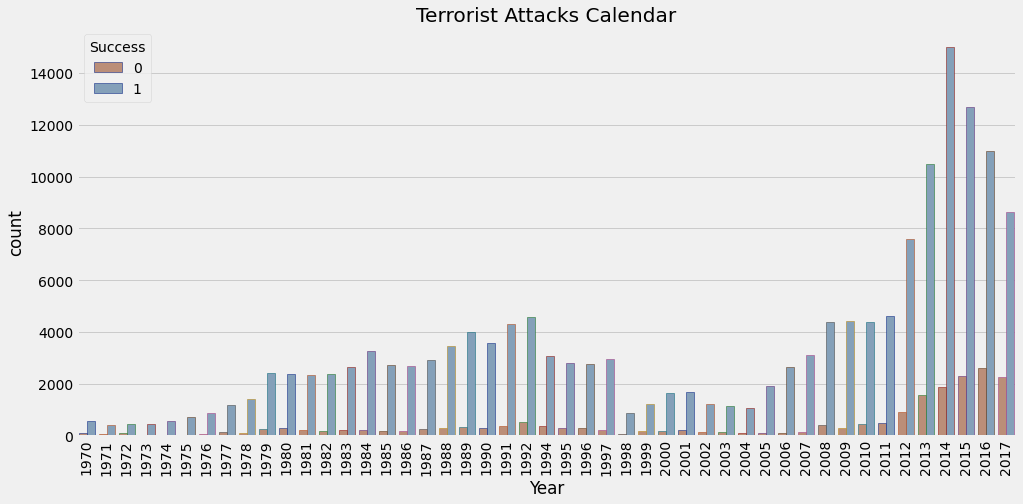

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.countplot(x='Year',data=data, hue='Success', palette='twilight_shifted_r', edgecolor=sns.color_palette('dark',10))
plt.title('Terrorist Attacks Calendar')

### Casualties in Terror Attacks

Text(0.5, 1.0, 'Casualties In Terror Attacks')

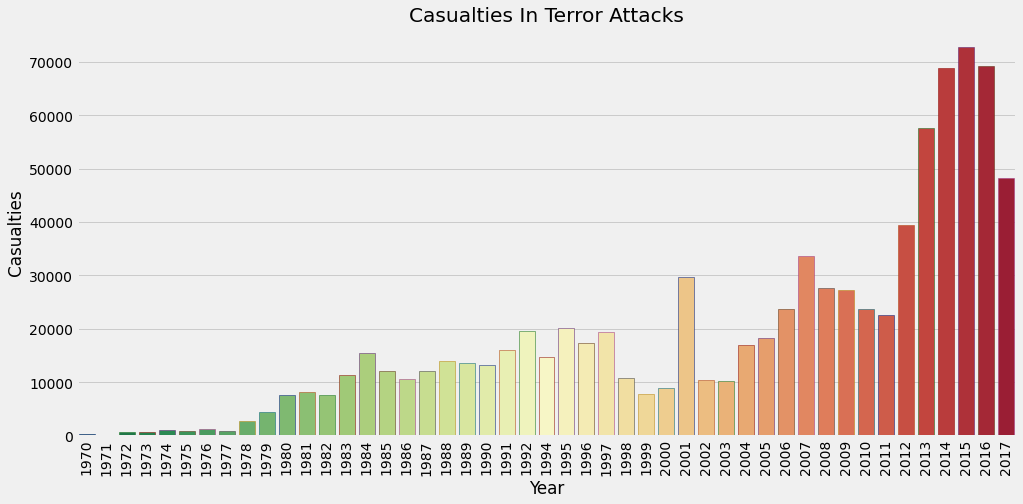

In [24]:
plt.figure(figsize=(15,7))
year_cas = data.groupby('Year')['Casualties'].sum().reset_index()
year_cas.columns = ['Year', 'Casualties']
plt.xticks(rotation=90)
sns.barplot(x=year_cas.Year, y=year_cas.Casualties, palette='RdYlGn_r', edgecolor=sns.color_palette('dark',10))
plt.title('Casualties In Terror Attacks')

### Most Attacked Country

Text(0.5, 1.0, 'Terror Prone Country')

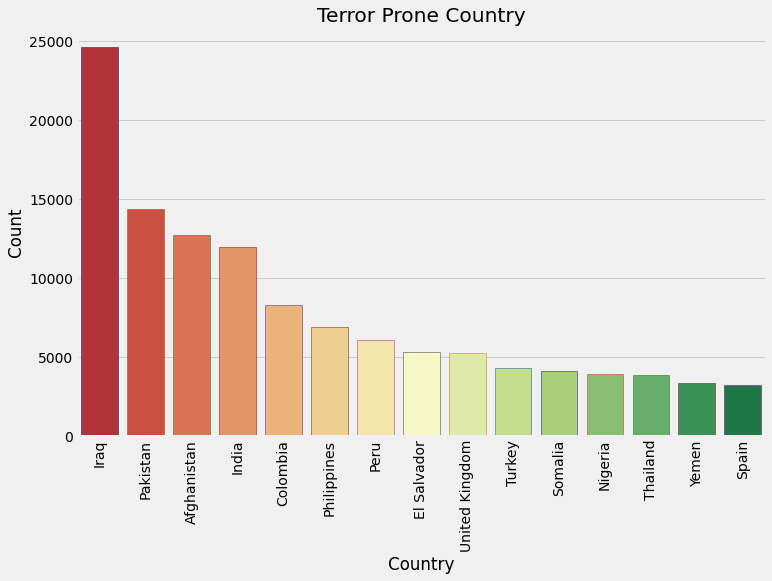

In [29]:
plt.figure(figsize=(11,7))
country_attacks = data['Country'].value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Count']
plt.xticks(rotation=90)
sns.barplot(x=country_attacks['Country'], y=country_attacks['Count'],
            palette='RdYlGn', edgecolor=sns.color_palette('dark',10))
plt.title('Terror Prone Country')

### Most Casualties- Country wise

Text(0.5, 1.0, 'Casusalties in Each country')

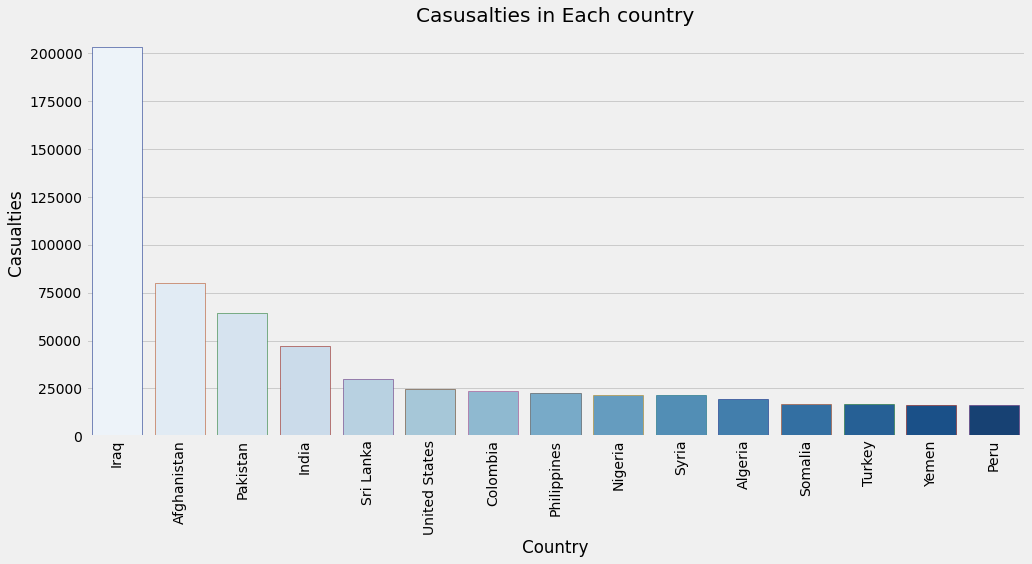

In [32]:
plt.figure(figsize=(15,7))
country_cas = data.groupby('Country')['Casualties'].sum().reset_index().sort_values('Casualties', ascending=False)[:15]
country_cas.columns = ['Country', 'Casualties']
plt.xticks(rotation=90)
sns.barplot(x=country_cas['Country'], y=country_cas['Casualties'],
            palette='Blues', edgecolor=sns.color_palette('dark',10))
plt.title('Casusalties in Each country')

### Attacks per Region

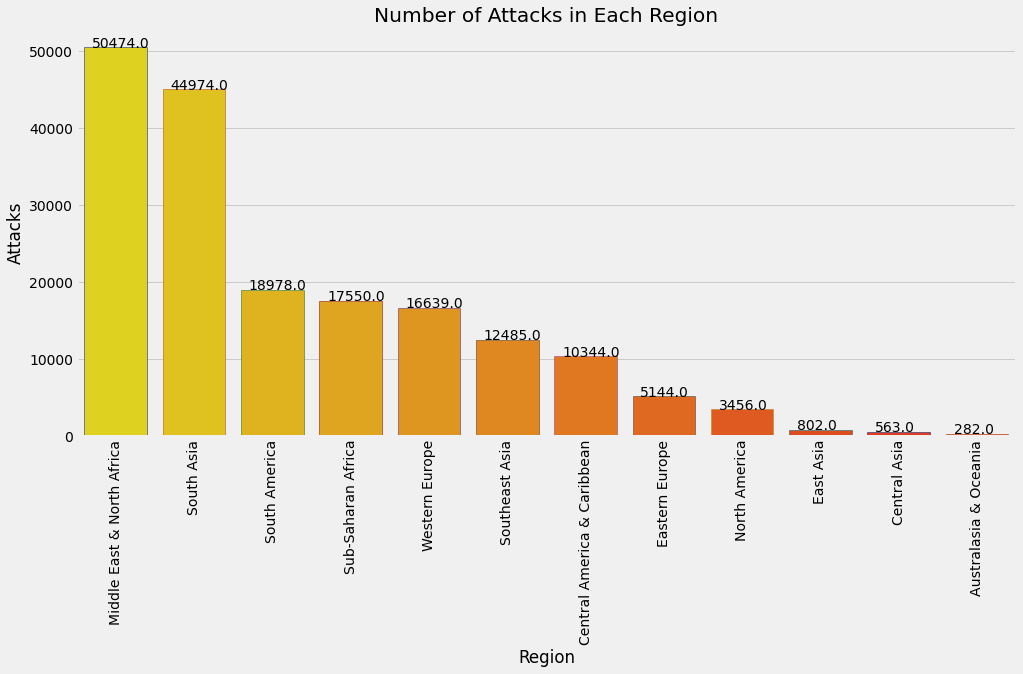

In [40]:
plt.figure(figsize=(15,7))
region_attacks = data['Region'].value_counts().reset_index()
region_attacks.columns = ['Region', 'Attacks']
plt.xticks(rotation=90)
ax = sns.barplot(x=region_attacks.Region, y=region_attacks.Attacks,
            palette='autumn_r', edgecolor=sns.color_palette('dark',10))
plt.title('Number of Attacks in Each Region')

for fig in ax.patches:
    ax.annotate(format(fig.get_height()), (fig.get_x()+0.1, fig.get_height()+2))

### Most preferred method for Attacks

Text(0.5, 1.0, 'Mostly Used Weapons')

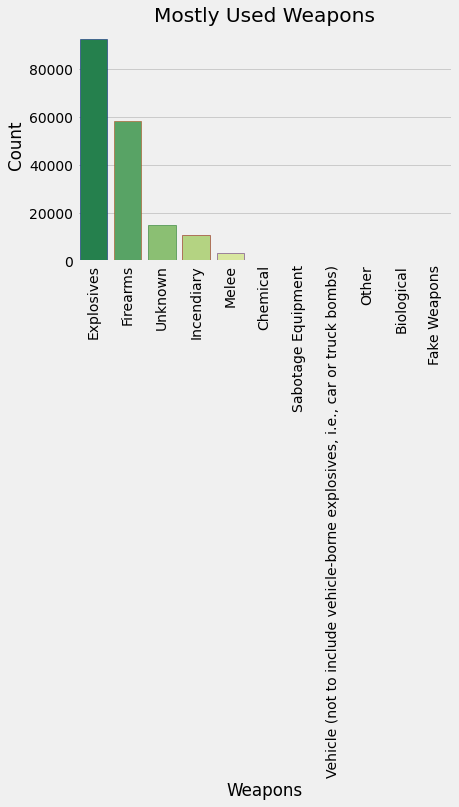

In [43]:
# plt.figure(figsize=(12,7))
weapons = data['Weapon_type'].value_counts()[:11].reset_index()
weapons.columns = ['Weapons', 'Count']
plt.xticks(rotation=90)
sns.barplot(x=weapons.Weapons, y=weapons.Count,
            palette='RdYlGn_r', edgecolor=sns.color_palette('dark',10))
plt.title('Mostly Used Weapons')

## Thank You!